In [9]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import matplotlib.pyplot as plt

import numpy as np

import utils

In [8]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('Class labels:', np.unique(y))

# Datasets are already shuffled by sklearn
# Thanks to that otherwise all training data would be of the same classes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
# stratification makes sure that both train and test sets have the same proportion of classes, e.g.:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

# Feature scale to make sure the data can be trained within the acceptable range of the model
sc = StandardScaler()
sc.fit(X_train)  # Estimates mean and std for each feature
X_train_std = sc.transform(X_train)  # Standardizes the features in training set
X_test_std = sc.transform(X_test)  # Uses same standardization for test set, to make sure they are comparable

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

Class labels: [0 1 2]
Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


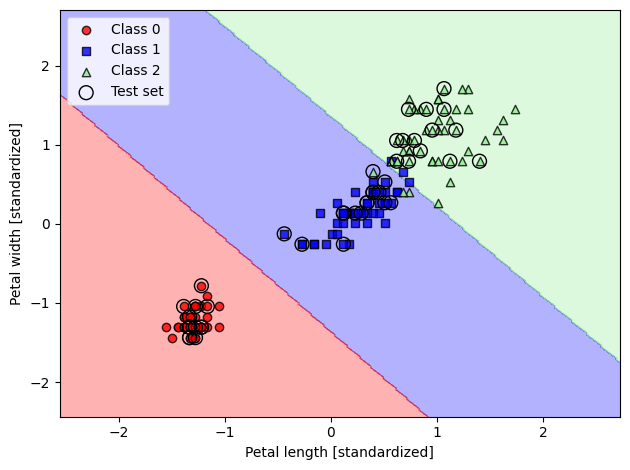

In [10]:
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)

utils.plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Solving Non-linearizable Problem using SVM Kernel Method

The idea is to create non-linear combinations of the original features to project them onto a higher-dimensional space via a mapping function $\phi$ and find a hyperplane that separates the classes in this new feature space. One example of non-linear combination which would transform the example below in a 3 dimensional
linearly separable problem could be given by the function below:

$$\phi(x_1, x_2) = (z_1, z_2, z_3) = (x_1, x_2, x_1^2 + x_2^2)$$

Roughly speaking, the term “kernel” can be interpreted as a similarity function between a pair of examples.

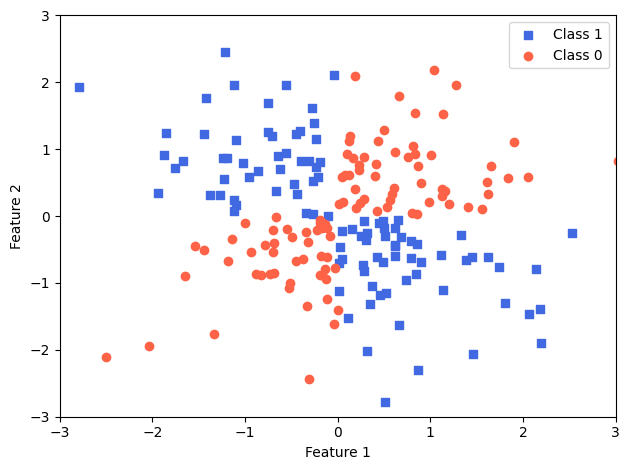

In [11]:
# Creating a fictional dataset that is not linearizable
np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, 0)

plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='royalblue', marker='s',
            label='Class 1')
plt.scatter(X_xor[y_xor == 0, 0],
            X_xor[y_xor == 0, 1],
            c='tomato', marker='o',
            label='Class 0')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

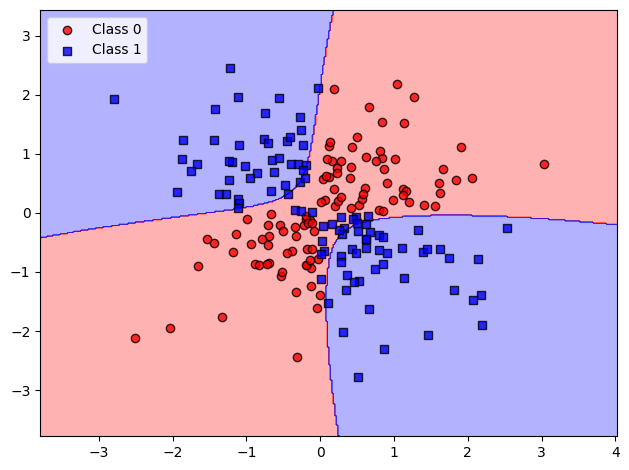

In [13]:
# Using a kernel to solve the problem
# Gamma is a cut-off parameter for the Gaussian sphere (used in RBF kernel)
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
utils.plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

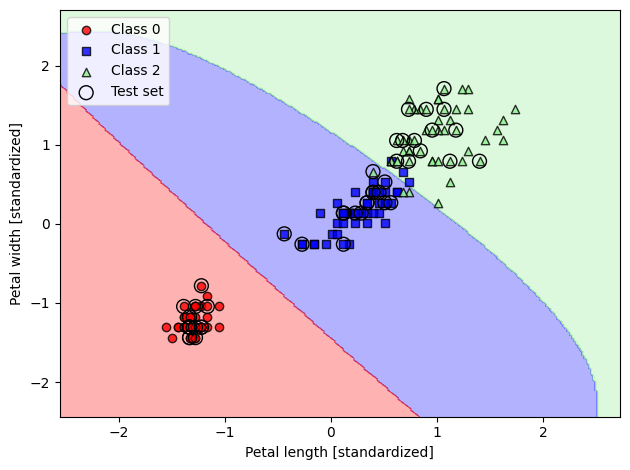

In [14]:
# Using the same kernel to solve the iris dataset
svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)
utils.plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

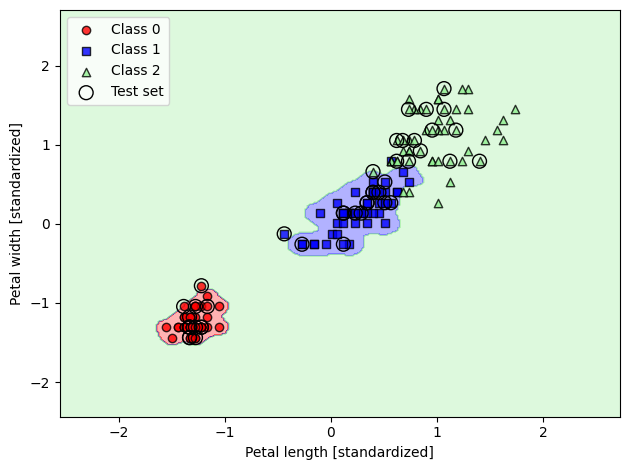

In [16]:
# Notice in the previous example because we choose a small gamma, the decision boundary is relatively soft.
# If we increase gamma, the decision boundary will be tighter around the data points.
svm = SVC(kernel='rbf', random_state=1, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)
utils.plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# although the model fits the training data well, it'll likely have a high generalization error on the test set
# due to overfitting (high variance).